<a href="https://colab.research.google.com/github/gboada23/Interpolacion-e-integracion-numerica/blob/main/Analisis_numerico_Interpolacion_compuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS NUMERICO INTERPOLACION COMPUESTA E INTEGRACION NUMERICA

#### **1. Programe la expansion en polinomios de Taylor de diferentes grados para $f(x) = e^x$ alrededor de $x_0 = 0$.**

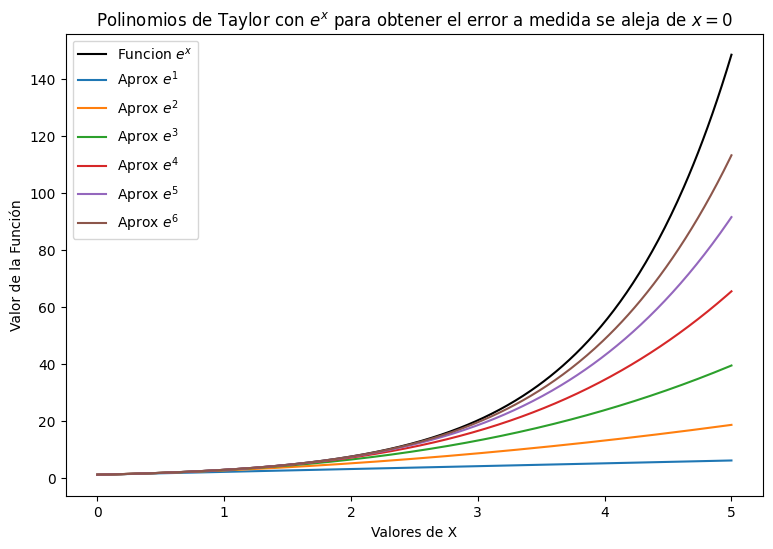

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
def taylor_exponencial(x, k):
    aproximacion = 0
    for i in range(k+1):
        aproximacion += x**i / math.factorial(i)
    return aproximacion
def grafica_taylor():
  x = np.linspace(0, 5, 400)
  y_actual = np.exp(x)
  plt.figure(figsize=(9,6))
  # Graficamos la función real e^x
  plt.plot(x, y_actual, label="Funcion $e^x$", color='black')
  # Graficamos las aproximaciones para grados del 1 al 6 y estudiar su comportamiento
  for degree in [1, 2, 3, 4, 5, 6]:
      y_approx = [taylor_exponencial(xi, degree) for xi in x]
      plt.plot(x, y_approx, linestyle='-', label=f"Aprox $e^{degree}$")
  plt.legend()
  plt.title('Polinomios de Taylor con $e^x$ para obtener el error a medida se aleja de $x=0$')
  plt.xlabel('Valores de X')
  plt.ylabel('Valor de la Función')
  return plt.show()
grafica_taylor()


In [ ]:
import pandas as pd
import numpy as np
x = np.linspace(0, 5, 6)
y_actual = np.exp(x)
# Crear un DataFrame para almacenar los errores
error_data = pd.DataFrame()
error_data['Valores de x'] = x
# Calcular el error para cada grado del polinomio de Taylor y añadirlo al DataFrame
for degree in [1, 2, 3, 4, 5, 6]:
    y_approx = np.array([taylor_exponencial(xi, degree) for xi in x])
    error = np.abs(y_actual - y_approx)
    error_data[f'error T({degree})'] = error
# Redondeamos a 4 decimales
round(error_data,4)

,Valores de x,error T(1),error T(2),error T(3),error T(4),error T(5),error T(6)
0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.0,0.7183,0.2183,0.0516,0.0099,0.0016,0.0002
2,2.0,4.3891,2.3891,1.0557,0.3891,0.1224,0.0335
3,3.0,16.0855,11.5855,7.0855,3.7105,1.6855,0.6730
4,4.0,49.5982,41.5982,30.9315,20.2648,11.7315,6.0426
5,5.0,142.4132,129.9132,109.0798,83.0382,56.9965,35.2951


 #### **1.1 ¿Qué sucede con el error conforme nos alejamos de $X_0=0$ ?**

 Podemos Observar en la grafica que el error en $X=0$ es exactamente 0 para cada Grado de Taylor debido a que todas las funciones en diferentes grados pasan por ese punto sin embargo a medida que nos vamos alejando de $X=0$ podemos observar que el error va incrementando para todos los grados del polinomio, pero otra acotacion seria que mientras el grado del polinomio sea mayor el error se va haciendo más pequeño como observamos en la grafica ya que de los 6 polinomios que se graficaron el que mejor se aproxima en terminos de $X$ es el polinomio de grado **$e^6$** para verlo de otra forma podemos observar el Dataframe que obtuve restando el valor real de la funcion menos la aproximaxion en valor absoluto para cada valor de $X$ y para cada grado del Polinomio de Taylor.

#### **2. Programe la expansion en polinomios de Taylor de diferentes grados para $f(x) =\frac{1}{x}$ alrededor de x0 = 1 para aproximar $f(3) =\frac{1}{3}$**

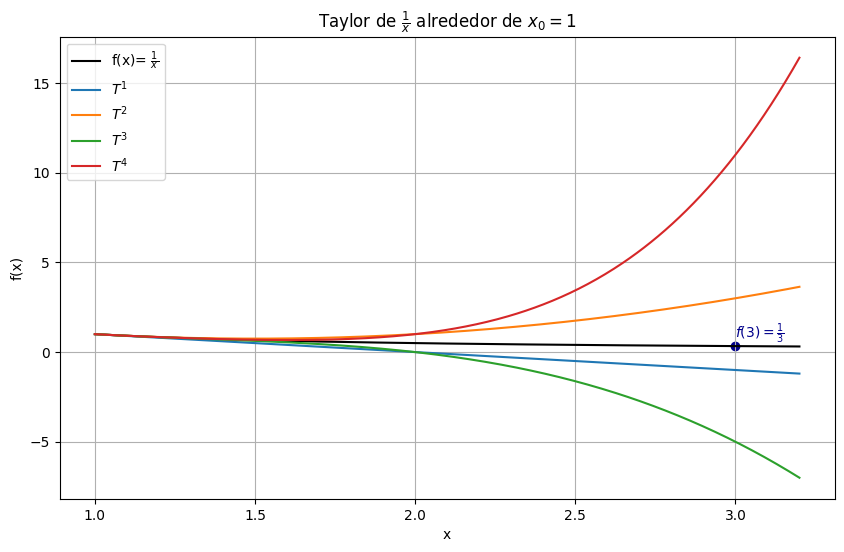

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, factorial, lambdify

# Usamos simpy ya que es la unica forma de calcular la derivada de una funcion en python sin hacerla manualmente
# Definir la variable y la función
x_sym = symbols('x')
f = 1/x_sym

# Función para calcular la n-ésima derivada de f(x) = 1/x
def n_esima_derivada(f, n):
    for _ in range(n):
        f = diff(f, x_sym)
    return f
# Función para calcular la expansión de Taylor hasta el grado 4 para f(x) en x0
def taylor_expansion(f, x0, n, x_vals):
    expansion = np.zeros_like(x_vals, dtype=float)
    for i in range(n + 1):
        term_func = lambdify(x_sym, n_esima_derivada(f, i) / factorial(i))
        expansion += term_func(x0) * ((x_vals - x0)**i)
    return expansion
# Valores de x para graficar desde 1 a 3,2
x_vals = np.linspace(1,3.2, 400)
# Graficar la función original y las aproximaciones de Taylor
plt.figure(figsize=(10, 6))
plt.plot(x_vals, 1/x_vals, label='f(x)= $\\frac{1}{{x}}$', color='black')
# Graficamos las aproximaciones para grados 1, 2, 3, 4
x0 = 1
for grados in [1, 2, 3,4]:
    y_approx = taylor_expansion(f, x0, grados, x_vals)
    plt.plot(x_vals, y_approx, linestyle='-', label=f'$T^{grados}$')
# Añadimos un punto en el plano donde la funcion vale 1/3
plt.scatter([3], [1/3], color='darkblue')
# Valor de f(x) en x = 3
plt.text(3, 1/3, '$f (3) = \\frac{1} {{3}}$', verticalalignment='bottom', color='darkblue')
plt.title('Taylor de $\\frac{1}{{x}}$ alrededor de $x_0 = 1$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Podemos observar en la grafica que en caso contrario con el polinomio de taylor para $e^x$ este polinomio de $f(x) = \frac{1}{{x}}$ a medida que se aumentan los grados el error se va haciendo más grande ya que el polinomio de taylor de grado 1 es el que menor tiene error de los 4 que se aproximaron.

En resumen, el comportamiento divergente y la naturaleza de la serie de Taylor de $f(x) = \frac{1}{{x}}$  alrededor de $f(x) =1$ resulta en una disminución de la precisión de la aproximación para valores de x alejados de 1, incluso cuando se aumenta el grado del polinomio.

En cambio para $e^x$, la serie de Taylor es una aproximación efectiva en todo su dominio, y su precisión aumenta con el grado del polinomio.

#### **3. Use interpolacion compuesta para aproximar f(x) en el intervalo [a, b] usando n puntos. Muestre ejemplos graficos.**


La interpolación compuesta al igual que la integracion compuesta se refiere a la aproximación de una función $f(x)$ en un intervalo $[a,b]$ usando varios puntos dentro del intervalo para construir polinomios de interpolación. Generalmente, este enfoque implica dividir el intervalo $[a,b]$ en subintervalos más pequeños y aplicar interpolación (usualmente polinomios de Lagrange o de Newton) en cada subintervalo. Al hacer esto, se mejora la precisión de la interpolación para toda la función en el intervalo completo.

###Vamos a usar El metodo de newton compuesta

**KroghInterpolator** es una libreria de python que usaremos que es capaz de construir el polinomio interpolador clásico de Newton cuando se le proporcionan solo los valores de la función (sin derivadas). Por tanto, se comporta como una interpolación de Newton cuando se usa de esta manera.

En resumen, el método a continuacion para la interpolación es el método de Newton, aplicado a través de la función KroghInterpolator que permite realizar interpolación polinómica con n subintervalos.


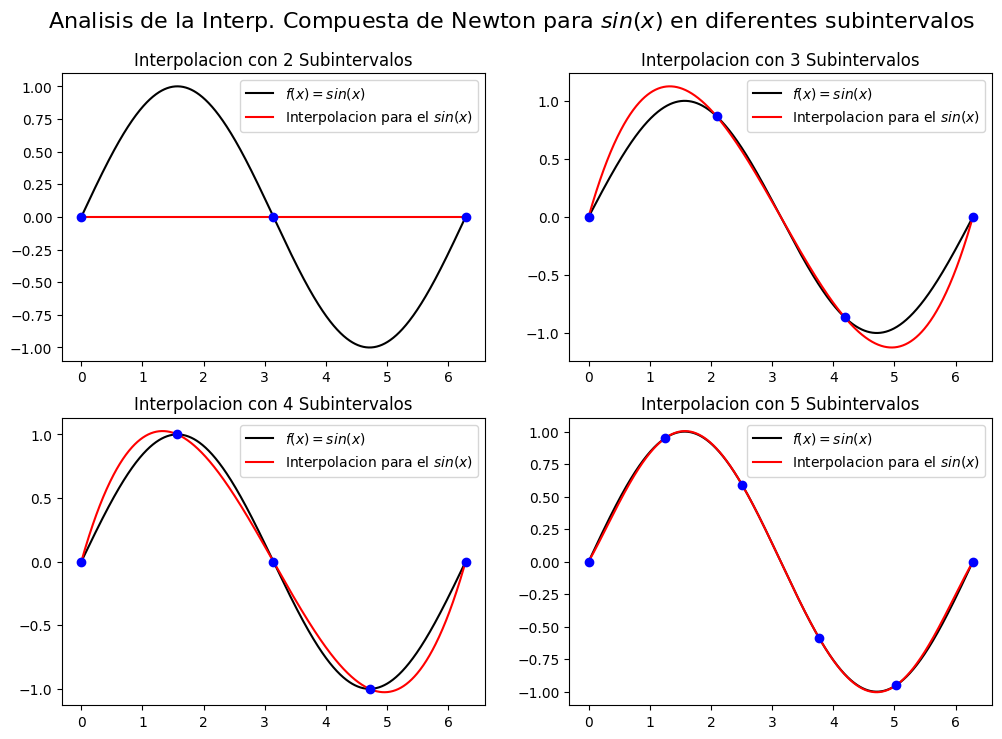

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import KroghInterpolator
# Primero, definimos la función para la interpolación de Newton
def newton_interpolacion(x, y, x_vals):
    # Crear el objeto de interpolación de Newton
    interpolator = KroghInterpolator(x, y)
    # Calcular los valores interpolados
    return interpolator(x_vals)
# Ahora, creamos una figura con una matriz de gráficas 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Definir la función original y el intervalo
def f(x):
    return np.sin(x)
a, b = 0, 2*np.pi  # Intervalo
x_vals = np.linspace(a, b, 1000)  # Valores de x para la gráfica
y_vals = f(x_vals)  # Valores de y para la gráfica
# Lista de subintervalos para probar
subintervalos_lista = [2, 3, 4, 5]
#titulo general
fig.suptitle('Analisis de la Interp. Compuesta de Newton para $sin(x)$ en diferentes subintervalos', fontsize=16)
# Ajustar el espacio superior para el título general
plt.subplots_adjust(top=0.9)
for i, subintervalo in enumerate(subintervalos_lista):
    # Generar puntos de interpolación
    x_points = np.linspace(a, b, subintervalo + 1)
    y_points = f(x_points)
    # Interpolar y evaluar los valores de x
    y_interp = newton_interpolacion(x_points, y_points, x_vals)
    # Seleccionar el eje actual para la grafica
    ax = axes[i//2, i%2]
    # Graficamos la función y la interpolación obtenida
    ax.plot(x_vals, y_vals, label='$f(x)= sin(x)$', color='black')
    ax.plot(x_vals, y_interp, label=f'Interpolacion para el $sin(x)$', linestyle='-', color='red')
    ax.scatter(x_points, y_points, color='blue', zorder=5)  # Puntos de interpolación
    # Títulos y leyendas
    ax.set_title(f'Interpolacion con {subintervalo} Subintervalos')
    ax.legend()
#mostrar la gráfica
plt.show()

**En conclusión**


Las gráficas obtenidas de la interpolación compuesta utilizando el método de Newton para la función sin(x) muestran cómo la interpolación se aproxima a la función original a medida que aumenta el número de subintervalos, Esto se debe a que con pocos puntos, el polinomio interpolador tiene menos 'flexibilidad' para ajustarse a las curvas de la función.

las gráficas demuestran que para la función $sin(x)$, la interpolación compuesta con un número moderado de subintervalos proporciona una buena aproximación a la función original en todo el intervalo
$[0,2π]$. Este enfoque equilibra la precisión de la interpolación con la estabilidad numérica, evitando los problemas asociados con polinomios de interpolación de alto grado.

#### **4. ¿Que diferencias hay entre la interpolacion compuesta con polinomios de grado 3 y la interpolacion usando spline cubicos?**

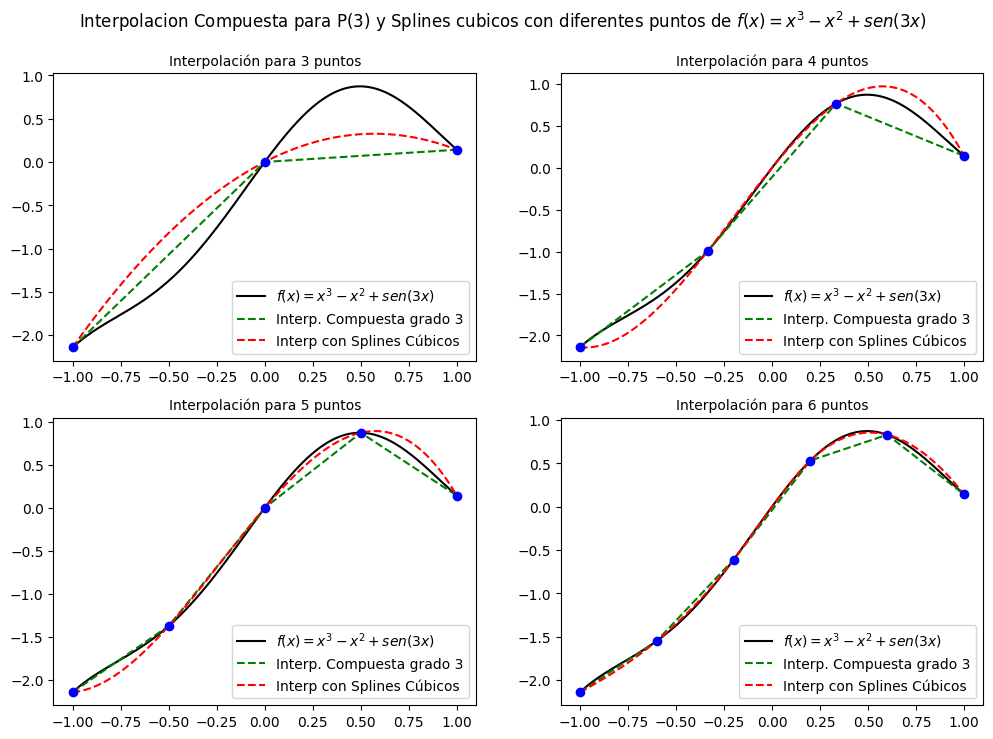

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import KroghInterpolator, CubicSpline
# Definir la función a interpolar
def f(x):
    return x**3 - x**2 + np.sin(3 * x)
# Función para evaluar la interpolación compuesta
def eval_interpolacion_compuesta(x, composite_interpolator, x_points):
    for i in range(len(x_points) - 1):
        if x_points[i] <= x <= x_points[i+1]:
            return composite_interpolator[i](x)
    return None
# Intervalo para la función
a, b = -1, 1
x_vals_fine = np.linspace(a, b, 1000)
y_actual = f(x_vals_fine)
# Crear la figura y los ejes para la matriz de gráficas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Números de puntos para las interpolaciones
n_points_list = [3, 4, 5, 6]
#titulo general
fig.suptitle('Interpolacion Compuesta para P(3) y Splines cubicos con diferentes puntos de $f (x)= x^3-x^2+sen(3x)$ ', fontsize=12)
# Ajustar el espacio superior para el título general
plt.subplots_adjust(top=0.9)
# Iterar sobre los diferentes números de puntos y crear las gráficas
for n_points, ax in zip(n_points_list, axes.flatten()):
    # Generar puntos de interpolación equidistantes
    puntos_x = np.linspace(a, b, n_points)
    puntos_y = f(puntos_x)
    # Interpolación compuesta con polinomios de grado 3
    interpolador_compuesto = []
    for i in range(n_points - 1):
        x_piece = puntos_x[i:i+2]
        y_piece = puntos_y[i:i+2]
        interpolador = KroghInterpolator(x_piece, y_piece)
        interpolador_compuesto.append(interpolador)
    # Interpolación con splines cúbicos
    cubic_spline_interpolator = CubicSpline(puntos_x, puntos_y)
    # Evaluamos las interpolaciones
    y_composite = [eval_interpolacion_compuesta(x, interpolador_compuesto, puntos_x) for x in x_vals_fine]
    y_spline = cubic_spline_interpolator(x_vals_fine)
    # Graficamos la función y las interpolaciones
    ax.plot(x_vals_fine, y_actual, label='$f (x)= x^3-x^2+sen(3x)$',linestyle='-' ,color='black')
    ax.plot(x_vals_fine, y_composite, label='Interp. Compuesta grado 3', linestyle='--', color='green')
    ax.plot(x_vals_fine, y_spline, label='Interp con Splines Cúbicos', linestyle='--', color='red')
    ax.scatter(puntos_x, puntos_y, color='blue', zorder=5)
    ax.set_title(f'Interpolación para {n_points} puntos',fontsize=10)
    ax.legend()
plt.show()

**Conclusiones**

Ambos métodos pasan por todos los puntos de datos, pero la interpolación de splines cúbicos tiende a dar una curva más suave que se asemeja más estrechamente a la función original, especialmente entre los puntos de interpolación. Esto es particularmente útil en aplicaciones donde la suavidad de la curva es importante, como en simulaciones físicas o gráficos por computadora.

La diferencia en la suavidad es más notable en las regiones entre los puntos de interpolación, ya que se construye una pieza única de función cúbica (spline cúbico) para cada subintervalo, pero estos splines están conectados de manera que la primera y segunda derivadas son continuas en los puntos de unión Los polinomios de grado 3 pueden tener cambios abruptos de curvatura, debido a que no hay garantía de suavidad en las derivadas en los puntos de unión de los subintervalos, lo que puede resultar en cambios bruscos en la pendiente o curvatura de la función interpolada. mientras que los splines cúbicos ofrecen transiciones suaves, lo cual es evidente al observar cómo la interpolación con splines cúbicos sigue la función $f (x)= x^3-x^2+sen(3x)$ de manera más uniforme a lo largo del intervalo mientras que la compuesta en cada punto traza una linea recta de punto a punto

#### **5. ¿Que diferencias hay entre la aproximacion por polinomios de Taylor y la aproximacion con polinomios de Lagrange?**


## Fundamentos y Construccion:
1. **Polinomios de Taylor:** Se basan en la expansión de una función alrededor de un punto específico $x_0$.
Los polinomios de Taylor utilizan las derivadas de la función en ese punto para construir la aproximación. La idea es que la función puede ser aproximada por la suma de sus términos de potencias de $(x-x_0)$, donde cada término es una derivada de la función evaluada en $x_0$, dividida por el factorial del grado de la derivada.
2. **Polinomios de Lagrange:** Estos polinomios se construyen para que pasen exactamente por un conjunto dado de puntos de datos. La aproximación de Lagrange no depende de las derivadas de la función, sino únicamente de los valores de la función en algunos puntos específicos. El polinomio resultante es una combinación lineal de polinomios base, cada uno asociado a un punto de datos, y está diseñado para ser igual a 1 en su punto asociado y 0 en todos los demás puntos de datos.

## Aplicaciones y Uso:
1. **Polinomios de Taylor:** Son útiles cuando se conocen las derivadas de la función y se desea realizar una aproximación local alrededor de un punto específico. Son particularmente eficaces para aproximaciones cerca del punto de expansión y son ampliamente utilizados en análisis matemático y físico, especialmente en situaciones donde se requiere una aproximación en un pequeño intervalo alrededor de un punto.
2. **Polinomios de Lagrange:** Se utilizan cuando se tienen valores discretos de una función y se desea encontrar un polinomio que pase por todos esos puntos. Son especialmente útiles para la interpolación de datos o funciones donde no se conocen las derivadas o no se pueden calcular fácilmente.

## Comportamiento y Limitaciones:
1. **Polinomios de Taylor:** Pueden no proporcionar una buena aproximación lejos del punto de expansión, especialmente si la función cambia rápidamente o es muy no lineal fuera de un pequeño intervalo.
2. **Polinomios de Lagrange:** Pueden sufrir del fenómeno de Runge, donde la interpolación oscila excesivamente entre los puntos de datos, especialmente con un alto número de puntos de interpolación y en los extremos del intervalo de interpolación.

En resumen, la elección entre los polinomios de Taylor y de Lagrange depende de la naturaleza del problema, la disponibilidad de información sobre la función y el objetivo de la aproximación. Mientras que los polinomios de Taylor son ideales para aproximaciones locales que requieren conocimiento de las derivadas, los polinomios de Lagrange son más adecuados para la interpolación basada en puntos de datos discretos.
Veamolos con un ejemplo:







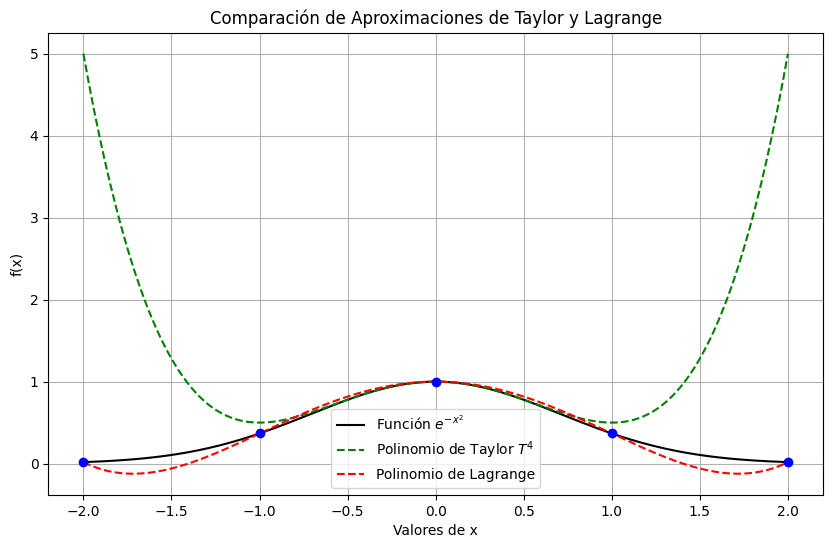

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import sympy as sp

# Definir la función original y su representación simbólica
x_sp = sp.symbols('x')
f_sp = sp.exp(-x_sp**2)
f = lambda x: np.exp(-x**2)

# Calcular el polinomio de Taylor de grado 4 alrededor de x_0 = 0 utilizando sympy
taylor_polynomial_sympy = sum([f_sp.diff(x_sp, n).subs(x_sp, 0) / sp.factorial(n) * (x_sp)**n for n in range(5)])
taylor_func_sympy = sp.lambdify(x_sp, taylor_polynomial_sympy, 'numpy')

# Seleccionar puntos para el polinomio de Lagrange y calcularlo
x_points_lagrange = np.linspace(-2, 2, 5)
y_points_lagrange = f(x_points_lagrange)
lagrange_polynomial = lagrange(x_points_lagrange, y_points_lagrange)

# Evaluar las funciones
x_vals = np.linspace(-2, 2, 400)
y_actual = f(x_vals)
y_taylor_sympy = taylor_func_sympy(x_vals)
y_lagrange = lagrange_polynomial(x_vals)

# Graficar las funciones
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_actual, label='Función $e^{-x^2}$', color='black')
plt.plot(x_vals, y_taylor_sympy, label='Polinomio de Taylor $T^4$', linestyle='--', color='green')
plt.plot(x_vals, y_lagrange, label='Polinomio de Lagrange', linestyle='--', color='red')
plt.scatter(x_points_lagrange, y_points_lagrange, color='blue', zorder=5)
plt.title('Comparación de Aproximaciones de Taylor y Lagrange')
plt.xlabel('Valores de x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

La gráfica ilustra claramente las diferencias entre estos dos métodos de aproximación. Mientras que el polinomio de Taylor es excelente para aproximaciones locales cerca del punto de partida $x_o = 0$, pero su precisión disminuye a medida que nos alejamos de este punto.

Por otro lado el polinomio de Lagrange proporciona una buena aproximación global que se ajusta exactamente a los puntos de datos específicos, pero puede no ser tan preciso en otras áreas.

#### **6. Resuelva un problema de aplicacion financiera-estadistica-actuarial, en el que pueda usar polinomios de Lagrange (simple o compuesto), diferencias divididas de Newton y splines cubicos.**


Supongamos que tenemos las tasas de interés anuales para bonos con diferentes vencimientos y queremos estimar la curva de rendimiento para toda la gama de vencimientos.

Datos:

Tasas de interés para vencimientos a 1, 2, 3, 5 y 10 años
1. Métodos Polinomios de Lagrange: Aproximar la curva de rendimiento utilizando un
polinomio que pase exactamente por todas las tasas dadas.
2. Diferencias Divididas de Newton: Utilizamos este método para construir un polinomio de interpolación que pase por los mismos puntos.
3. Splines Cúbicos: Aproximar la curva de rendimiento con una serie de funciones polinómicas cúbicas, asegurando suavidad en los puntos de conexión.

Análisis:

Compararemos los resultados de los tres métodos en términos de suavidad de la curva, ajuste a los datos y plausibilidad como curva de rendimiento.
En finanzas, una curva de rendimiento suave es generalmente más deseable ya que los cambios bruscos en las tasas de interés son menos comunes.
Vamos a simular algunos datos de tasas de interés y aplicaremos estos métodos.

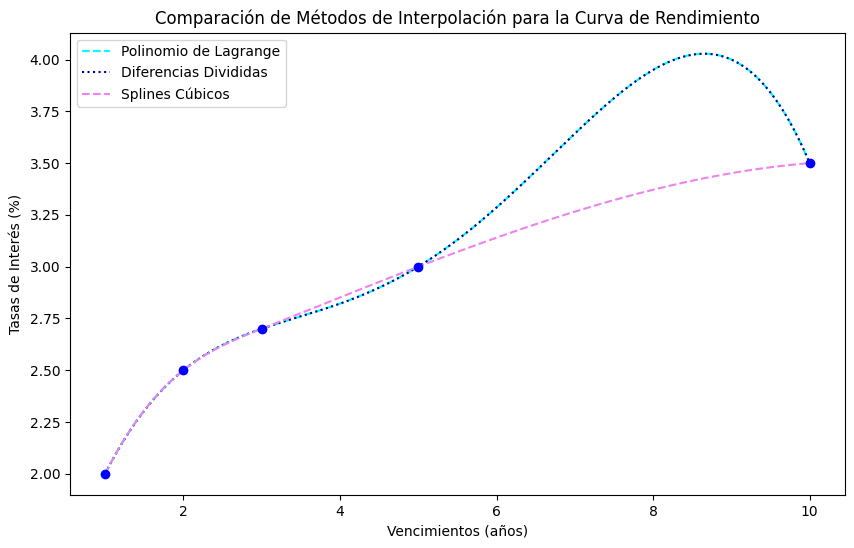

In [ ]:
from scipy.interpolate import KroghInterpolator, CubicSpline, lagrange
# Simular datos de tasas de interés para vencimientos a 1, 2, 3, 5 y 10 años
vencimientos = np.array([1, 2, 3, 5, 10])  # años
 # porcentajes
tasas_interes = np.array([2.0, 2.5, 2.7, 3.0, 3.5])
# Interpolación con Polinomios de Lagrange
lagrange_interpolator = lagrange(vencimientos, tasas_interes)
# Interpolación con Diferencias Divididas de Newton (KroghInterpolator)
newton_interpolator = KroghInterpolator(vencimientos, tasas_interes)
# Interpolación con Splines Cúbicos
cubic_spline_interpolator = CubicSpline(vencimientos, tasas_interes)
# Evaluamos las interpolaciones
vencimientos_fine = np.linspace(1, 10, 400)
lagrange_p = lagrange_interpolator(vencimientos_fine)
diferencias = newton_interpolator(vencimientos_fine)
splines = cubic_spline_interpolator(vencimientos_fine)
# Graficamos las curvas de rendimiento
plt.figure(figsize=(10, 6))
plt.scatter(vencimientos, tasas_interes, color='blue', zorder=5)  # Puntos de datos originales
plt.plot(vencimientos_fine, lagrange_p, label='Polinomio de Lagrange', linestyle='--', color='cyan')
plt.plot(vencimientos_fine, diferencias, label='Diferencias Divididas', linestyle=':', color='darkblue')
plt.plot(vencimientos_fine, splines, label='Splines Cúbicos', linestyle='--', color='violet')
plt.title('Comparación de Métodos de Interpolación para la Curva de Rendimiento')
plt.xlabel('Vencimientos (años)')
plt.ylabel('Tasas de Interés (%)')
plt.legend()
plt.show()

#### **¿ Cual metodo arrojo mejores resultados?**

**Conclusión:**

Los Splines Cúbicos  podrían ser la mejor opción para modelar la curva de rendimiento debido a su suavidad y realismo. siguen siendo una excelente opción para modelar la curva de rendimiento, especialmente en escenarios financieros donde se espera una transición suave entre las tasas de interés.

Los polinomios de Lagrange y Newton son menos preferibles para un número mayor de puntos debido a su tendencia a oscilar, lo que podría no ser representativo del comportamiento real de las tasas de interés.

#### **7.Calcule $\int_{a}^{b} \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}} dz$ usando la regla compuesta trapezoidal e integración de Romberg.**

'Para la regla de Romberg el resultado fue: 0.9973'

'El resultado de la regla del trapecio para 200 subintervalos fue: 0.997298'

'El resultado de la regla del trapecio para 1000 subintervalos fue:0.9973'

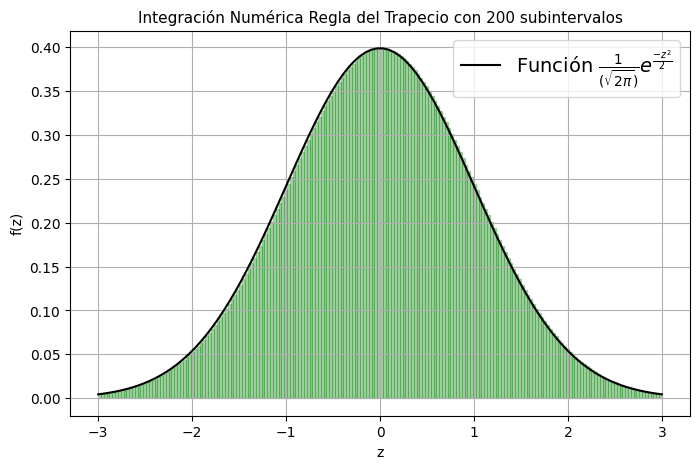

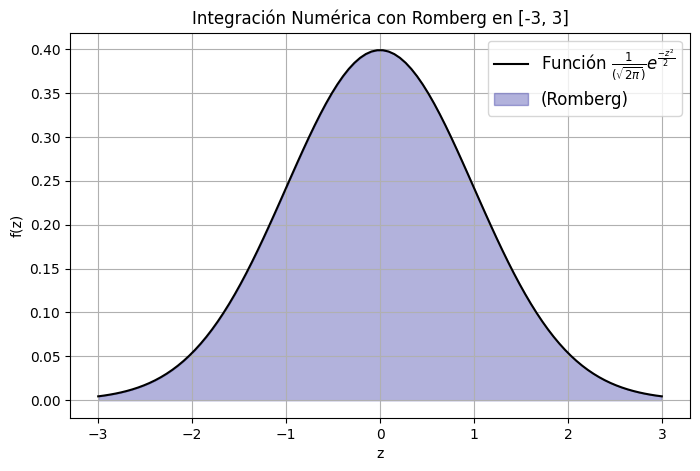

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.integrate import romberg
# Definir la función a integrar
def integrand(z):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-z**2 / 2)
# Definir los límites de integración
a, b = -3, 3
# Integración numérica usando la regla compuesta del trapecio
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    s = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        s += f(a + i * h)
    return h * s
# Aplicar la regla compuesta del trapecio para n = 200
n = 200  # Número de subintervalos para la regla del trapecio
# Integración de Romberg
romberg_result = romberg(integrand, a, b)
trapezoidal_results = [trapezoidal_rule(integrand, a, b, n) for n in [200,1000]]
display(f"Para la regla de Romberg el resultado fue: {round(romberg_result,6)}")
display(f"El resultado de la regla del trapecio para 200 subintervalos fue: {round(trapezoidal_results[0],6)}")
display(f"El resultado de la regla del trapecio para 1000 subintervalos fue:{round(trapezoidal_results[1],6)}")
# Evaluar la función en un rango de valores para graficar
x_vals = np.linspace(-3, 3, 100)
y_vals = integrand(x_vals)
# Gráfica para la regla del trapecio
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='Función $\\frac{1}{(\sqrt{2\pi})} e^\\frac{-z^2}{2}$', color='black')
# Usando n=1000 para la regla del trapecio
h = (b - a) / n
for i in range(n):
    xi = a + i * h
    xf = xi + h
    yf = integrand(xi)
    plt.gca().add_patch(patches.Polygon([[xi, 0], [xi, yf], [xf, yf], [xf, 0]], closed=True, color='green', alpha=0.3))
plt.title('Integración Numérica Regla del Trapecio con 200 subintervalos', fontsize=11)
plt.xlabel('z')
plt.ylabel('f(z)')
plt.legend(fontsize=14)
plt.grid(True)
plt.show()
# Gráfica para Romberg
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='Función $\\frac{1}{(\sqrt{2\pi})} e^\\frac{-z^2}{2}$', color='black')
plt.fill_between(x_vals, 0, y_vals, color='darkblue', alpha=0.3, label='(Romberg)')
plt.title('Integración Numérica con Romberg en [-3, 3]')
plt.xlabel('z')
plt.ylabel('f(z)')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

1. Regla del Trapecio: La primera gráfica muestra la aproximación del área bajo la curva utilizando la regla compuesta del trapecio. Cada pequeño trapecio verde representa un subintervalo de la integral en el caso de la grafica 200 subintervalos. Esta visualización demuestra cómo la regla del trapecio descompone el área en segmentos, sumando las áreas de estos trapecios para estimar la integral.

2. Romberg: La segunda gráfica representa la integración de Romberg. Aunque el método de Romberg no descompone visualmente el área como lo hace la regla del trapecio, la zona azul sombreada indica la región bajo la curva que se está integrando. Romberg utiliza un proceso de extrapolación para mejorar la precisión de la estimación de la integral.

Estas gráficas ofrecen una representación visual de cómo cada método aborda la tarea de calcular el área bajo la curva de la función dada, proporcionando una comparación clara entre los dos enfoques. sin embargo mientras más subintervalos tenemos para el metodo del trapecio más cerca del valor real estara la aproximacion

#### **8. Escoja un metodo de integracion doble y programelo.**
Forma general de una integral doble:

  - **$\int_{a}^{b}\int_{c}^{d}f(x,y)dxdy$**

Escogi un ejercicio del libro capitulo 4, ejemplo 1, Figura 4.20, pag 178

donde:

-  $f(x,y) = ln(x +2y)$

- a = 1.4, b = 2.0

- c = 1.5, d = 1.0

entonces la integral a aproximar es:

$\int_{1.4}^{2}\int_{1}^{1.5} \ln(x +2y)dxdy$

El valor real de:
- $\int_{1.4}^{2}\int_{1}^{1.5} \ln(x +2y)dxdy$ = 0.4295545265 para 10 decimales

Ahora vamos a aproximar esa integral doble usando metodo de simpson a la integral interna y luego ese resultado volvemos a integrar con simspon la integral externa

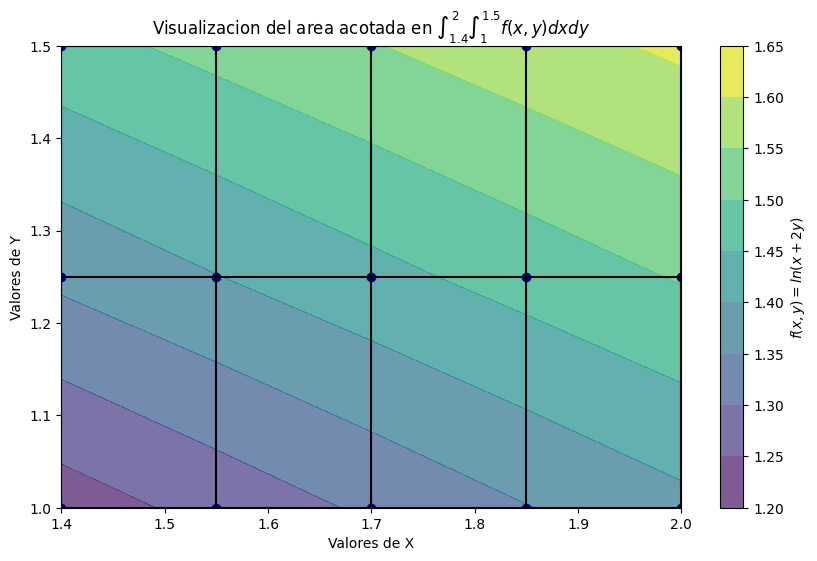

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.integrate import simps
# la funcion a integrar se escogio del libro
def integrand(x, y):
    return np.log(x + 2 * y)
# Definir los límites de integración
a, b, c, d = 2, 1.4, 1.5, 1  # Límites externos e internos
n, m = 4, 2  # Subintervalos para la integración externa Y externa
# Creamos los puntos para x e y
x, y = np.linspace(a, b, n + 1), np.linspace(c, d, m + 1)
# Crear una malla de puntos para x, y
X, Y = np.meshgrid(x, y)
# llamamos a la funcion integrando y la guardamos en Z
Z = integrand(X, Y)
# Aplicar la regla compuesta de Simpson
integral_simpson_x = simps(Z, x, axis=1)  # Aplicar Simpson en la dirección X
integral_simpson = simps(integral_simpson_x, y)  # a ese resultado aplicamos Simpson en la dirección Y
plt.figure(figsize=(10, 6))
plt.contourf(x, y, Z, cmap='viridis', alpha=0.7)
#valor de f(x,y)
plt.colorbar(label='$f(x,y) =ln(x + 2y)$')
# Dibujar líneas verticales y horizontales para delimitar los intervalos
for xi in x:
    plt.axvline(xi, color='black', linestyle='-')
for yi in y:
    plt.axhline(yi, color='black', linestyle='-')
plt.scatter(X, Y, color='darkblue')  # Puntos de corte para Simpson compuesta
plt.title('Visualizacion del area acotada en $\int_{1.4}^{2}\int_{1}^{1.5}f(x,y)dxdy$')
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')
plt.show()

Esta visualización ayuda a entender cómo se divide la región de integración para aplicar la regla de Simpson compuesta, mostrando la distribución espacial de los subintervalos ya que son 2 subintervalos para X y 4 subintervalos para Y

In [ ]:
valor_aprox = round(integral_simpson,10)
valor_real = 0.4295545265
print("El valor aprox de la integral es:",valor_aprox)
print("El valor real de la integral es:",valor_real)

El valor aprox de la integral es: 0.4295524387
El valor real de la integral es: 0.4295545265


#### Podemos concluir que la aproximacion obtenida para x, y es:

**$\int_{1.4}^{2}\int_{1}^{1.5} \ln(x +2y)dxdy \approx$ 0.4295524387**

Usando el metodo de Simpson:

Para X con 2 intervalos

Para Y con 4 intervalos

Los que nos dice que esta en el rango aceptado por una tolerancia y funciona correctamente, claro para ser más preciso habria que aumentar el numero de intervalos tanto para X y tanto para Y